## Analyze A/B Test Results for e-Commerce website

This project uses various statistical techniques to do A/B Testing on an e-commerce website.  The experiment is conducted on two versions of a web page "new_page" and "old_page".


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

This study creates an A/B test for an e-commerce website.  The purpose of this test is to decide if the "new_page" should be adopted or if the "old_page" should be kept.

A/B Testing is a way to compare two versions of a web page or application that enables you to determine which one performs better. It is one of the easiest ways to analyze an application or a web page and determine which version is better in terms of conversions. 

A conversion is defined as an action that's counted when someone interacts with your ad (for example, clicks a text ad or views a video ad) and then takes an action that you've defined as valuable to your business, such as an online purchase or a call to your business from a mobile phone.

<a id='probability'></a>
#### Part I - Probability

Import the libraries for the analysis.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` This section reads in the `ab_data.csv` data and stores it in `df`.  

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")

b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.shape[0] #number of rows of df dataset

294478

c. The number of unique users in the dataset.

In [5]:
unique_usrs =(df.user_id.unique()) #unique users in df dataset
len(unique_usrs) #number of unique users in the df dataset

290584

d. The proportion of users converted.

In [6]:
#converted users without dropping the duplicates - note this is not the correct value as it includes duplicates
converted_users = sum(df.converted == 1)/len(unique_usrs)
converted_users #proportion of users converted

0.12126269856564711

In [7]:
dfU = df.drop_duplicates('user_id')
dfU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [8]:
#converted users dropping the duplicates
converted_usersU = sum(dfU.converted == 1)/len(unique_usrs)
converted_usersU

0.1195695564793657

e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
#For the dataset with duplicates
df.head()
dfT = df[((df['group'] == 'treatment'))] #filter for all rows where 'group' == 'treatment'
dfT.shape[0] #147276 rows
dfTN = dfT[((dfT['landing_page'] == 'new_page'))] #filter again for all rows where 'landing_page' == 'new_page'
dfTN.shape[0]

treat_new_page = df.loc[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]
control_new_page = df.loc[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]
#dfTN[((dfTN['group'] == 'treatment') == (dfTN['landing_page'] == 'new_page')) == False].shape[0]
treat_or_new = df.loc[(df['group'] == 'treatment') != (df['landing_page'] == 'new_page')]
treat_or_new.shape[0]

3893

f. Do any of the rows have missing values?

In [10]:
df.isna == True #there are no missing values in this dataset

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.

a. To remove inconsistent data this section creates a new dataset that only includes data that is relevant to the analsis:

**df2T** is a new dataset that only includes rows where 'group' == 'treatment' and 'landing_page' == 'new_page'

**df2C** is a new dataset that only includes rows where 'group' == 'control' and 'landing_page' == 'old_page'

**dfTC** and **df2C** are concatenated into a new dataframe stored as **df2**.

In [11]:
###confirm all the possible values of the column 'group' and 'landing_page'
df.group.unique()  # the only values are array(['control', 'treatment'], dtype=object)
df.landing_page.unique() #array(['old_page', 'new_page'], dtype=object)

df2T = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]
df2C = df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]
#df2T.info() #145311
#df2C.info() #145274
df2 = pd.concat([df2T,df2C])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

`3.` This section confirms and removes duplicate data

a. How many unique **user_id**s are in **df2**?

In [13]:
len(df2.user_id.unique())

290584

b. There is one **user_id** repeated in **df2**.  The following code identifies the duplicate:

In [14]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id** and keep the dataframe as **df2**.

In [16]:
df2 = df2.drop([2893])

`4.` This section uses **df2** calculate the probability of conversion for the null hypothesis.  Then it examines the probability of conversion of the **control** and **treatment** groups in the data.  It then examines the percentage of uses with **new_page** and **old_page**.  It then examines if based on the actual data is there sufficient evidence that the new_page leads to more conversions.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
sum(df2.converted == 1)/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
control_new_pageUU = df2.loc[(df2['group'] == 'control')]
len(control_new_pageUU[(control_new_pageUU['converted']==1)] )/ control_new_pageUU.shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
treat_new_pageUU = df2.loc[(df2['group'] == 'treatment')]
len(treat_new_pageUU[(treat_new_pageUU['converted']==1)] )/ treat_new_pageUU.shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
len(df2[(df2['landing_page'] == 'new_page')])/df2.shape[0]

0.5000619442226688

e. This section considers the results from a. through d. above, and explains below if there is sufficient evidence to say that the new treatment page leads to more conversions.

In [21]:
treat_new_pageUU = df2.loc[(df2['group'] == 'treatment')]
new_conversion_rate = len(treat_new_pageUU[(treat_new_pageUU['converted']==1)] )/ treat_new_pageUU.shape[0] #0.11880806551510564
control_new_pageUU = df2.loc[(df2['group'] == 'control')]
old_conversion_rate = len(control_new_pageUU[(control_new_pageUU['converted']==1)] )/ control_new_pageUU.shape[0] #0.1204
observed_diff = new_conversion_rate - old_conversion_rate #-0.0015782389853555567
observed_diff

-0.0015782389853555567

As this data is a large sample it provides valuable information which seems to suggest that the new page does not lead to significantly more conversions with a very small observed difference of -0.00158, assuming the sample is representative of the popoulation.  Internet data is known to fluctuate during time of day and day of week and the sample should be examined to see if it is representative of all activity on the website and minimises the chance of sample bias.   It is a good practice to do a statistical analysis to determine if there is sufficient evidence that the new page treatment leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

`1.` For now lets consider making the decision just based on all the sample data in Part I.  If we assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%.  The hypotheses are stated in terms of words below which are the converted rates for the old and new pages.

**Null hypothesis:** new page is worse than or equal to the old page in conversion rate (type 1 error rate of 5%)

**Alternate hypothesis:** new page is better than old page in conversion rate

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

A sample size is used that is equal to the ones in **ab_data.csv**.  <br><br>

This section performs the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. The **convert rate** for $p_{new}$ under the null is:

In [22]:
#use the converted rate in ab_data.csv regardless of the page
df2_convert = sum(df2.converted == 1)/len(df2)
pnew = df2_convert
pnew

0.11959708724499628

b. The **convert rate** for $p_{old}$ under the null is: <br><br>

In [23]:
pold = df2_convert
pold

0.11959708724499628

c. $n_{new}$ is

In [24]:
nnew = len(df2.loc[(df2['landing_page'] == 'new_page')])#updated
nnew

145310

d. $n_{old}$ is:

In [25]:
nold = len(df2.loc[(df2['landing_page'] == 'old_page')])
nold

145274

e. This section simulates $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  It stores these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
#df_new = dfU.loc[(dfU['landing_page'] == 'new_page')]
#df_new.shape
nnew_sim = df2.loc[(df2['landing_page'] == 'new_page')].sample(nnew,replace = True)
new_page_converted = nnew_sim.converted
new_page_converted.mean()

0.11737664303902003

f. This section simulates $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  It stores these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
#df_old = dfU.loc[dfU['landing_page'] == 'old_page']
#df_old.shape
nold_sim = df2.loc[(df2['landing_page'] == 'old_page')].sample(nold,replace = True)
old_page_converted = nold_sim.converted
old_page_converted.mean()

0.12061346145903602

g. This section finds $p_{new}$ - $p_{old}$ for the simulated values from part (e) and (f).

In [28]:
#pnew is the probability of conversion on the new page

#p_new_old = pp_new - pp_old
pp_new = new_page_converted.mean()
pp_old = old_page_converted.mean()
p_new_old = pp_new - pp_old
#delta1
p_new_old

-0.0032368184200159966

h. This section simulates 10,000 $p_{new}$ - $p_{old}$ values using this same process similar to the ones calculated in parts **a. through g.** above.  The 10,000 values are stored in a numpy array called **p_diffs**.

In [29]:
p_diffs = np.random.binomial(nnew, pnew, 10000)*1.0/nnew - np.random.binomial(nold, pold, 10000)*1.0/nold
#binomial above from numpy is much more computationally efficient than the loop below and is calculated more efficiently

# When possible, it is always more computationally efficient to use numpy built-in operations over explicit for loops. 
# The short reason is that numpy-based operations attack a computational problem based on vectors by computing large chunks 
# simultaneously. Additionally, using loops to simulate 10000 can take a considerable amount of time vs using numpy
# https://softwareengineering.stackexchange.com/questions/254475/how-do-i-move-away-from-the-for-loop-school-of-thought
# Essentially, we are applying the null proportion to the total size of each page using the binomial distribution. 

#### This alternative approach took a long time to run  :-(
#p_diffs = []

#for _ in range(10000):
#    sim_df = df2.sample(df2.shape[0], replace = True)
#    new_conv_rate = sim_df.query("group == 'treatment'")['converted'].mean()
#    old_conv_rate = sim_df.query("group == 'control'")['converted'].mean()
#    p_diffs.append(new_conv_rate-old_conv_rate)
#    null_vals = np.random.normal(0, np.array(p_diffs).std(), len(p_diffs))
#    print ("Proportion Greater : {}".format((np.array(null_vals) > observed_diff).mean()), end = "\r")

i. Plot a histogram of the **p_diffs**.

In [30]:
len(p_diffs)

10000

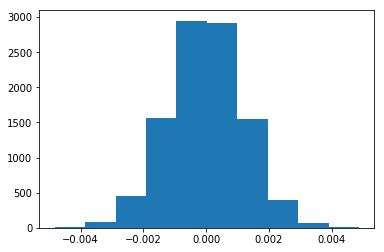

In [31]:
#print histogram
plt.hist(p_diffs);


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
actual_diff = np.array(p_diffs)
proportion = actual_diff > observed_diff
sum(proportion)/len(p_diffs)

0.9108

k. This section explains what is computed in part **j.**

The p-value is computed in j.  When you perform a hypothesis test in statistics, a p-value helps you determine the significance of your results. A large p-value (> 0.05) indicates weak evidence against the null hypothesis so you fail to reject the null hypothesis. The p-value is 0.91 of the p_diffs are greater than the observed data in ab_data.csv.  This value means we fail to reject the null hypothesis that new page is worse than or equal to the old page in conversion rate (type 1 error rate of 5%).

l. We can also use a built-in function from statsmodels.api to achieve similar results.  Using the built-in is easier to code, however the above portions walkthrough the ideas that are critical to think correctly about statistical significance for A/B testing. The code below calculates the number of conversions for each page, as well as the number of individuals who received each page. For this model `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively:

In [33]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = len(df2.loc[(df2['landing_page'] == 'old_page')])
n_new = len(df2.loc[(df2['landing_page'] == 'new_page')])

C:\Users\Phil Nelson\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. This section uses `sm.stats.proportions_ztest` to compute the test statistic and p-value.

In [34]:
#confirm number of conversions for p_old
convert_old

17489

In [35]:
convert_new

17264

In [36]:
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new, n_old],alternative='larger') #larger one-sided
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. This section discusses the z-score and p-value you computed in the previous section and explains what this means for the conversion rates of the old and new pages.  It also examines if they agree with the findings in parts **j.** and **k.**

The z-score indicates how many standard deviations away from the mean which is -1.3  This means that for the p-value of 0.9 indicates very weak evidence against the null hypothesis so it fails to reject the null hypothesis. The p-value is not enough to reject the null hypothesis as found using the sampling method.

The z value indicates that the mean are different by -1.3 std deviations.

<a id='regression'></a>
### Part III - A regression approach

`1.` This section shows that the results acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is in two states i.e. either a "conversion" or "no conversion" logistic regression is used.

Logistic Regression is used to predict anything with only two outcomes (in this case conversion or no conversion)

b. This section uses **statsmodels** to fit the regression model specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  First a column is created for the intercept, and then a dummy variable column is created for which page (i.e. new_page or old_page) each user received.  Also an **ab_page** column is added, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
#This section prepares the dataset into a binary model which can then be used for logistic regression modelling

df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2['ab_page'].mean()

0.5000619442226688

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
from scipy import stats # to fix bug "AttributeError: module 'scipy.stats' has no attribute 'chisqprob'"
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) #bug fix  "AttributeError: module 'scipy.stats' has no attribute..."

logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 18 Jul 2018   Pseudo R-squ.:               8.077e-06
Time:                        14:54:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. The p-value associated with **ab_page** is discussed and show above and it differs from the value found in **Part II**?<br><br>  The explanation for this is given below.

**Null hypothesis:** new page is equal to the old page in conversion rate (type 1 error rate of 5%) <br>
**Alternate hypothesis:** new page is better than or worse than the old page in conversion rate. <br>
This is a two sided hypothesis test whereas in section II it is a one-sided hypothesis test.
The p-value of .19 differs the value found in part II (0.905).  The two sided test of 0.19 can be compared with the one-sided test by comparing 1 - 0.19/2 = 1 - .095 = 0.905 which is equivalent.
Note that the R squared value is very small and so the logistic regression does not fit the data well.  None of the results provide enough evidence to reject the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

One of the key aspects to modelling is finding the factors or components that are most related or associated to the thing that is trying to be predicted this can be done using techniques like forward selection or backward selection. Domain knowledge and careful systematic questions can steer the analyst to consider other factors inside the dataset (ratio) or external data that may be able to be associated with the data.  However, simple models with fewer factors are easier for analysts and the business to understand and take actions which may be advantageous.  Models with more factors are more complex and sometimes may be difficult for the business to understand or take advantage of.  The assumptions for the model should be verified to determine whether they meet the precondition assumptions for modeling (i.e. independence and linearity) and can be verified using other analysis (e.g. residual plot, normal probability plot)

g. Now along with testing if the conversion rate changes for different pages this section adds an effect based on which country a user lives. The **countries.csv** dataset is read and merged together with the df2 datasets on the approporiate rows. 

In [40]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [41]:
df_new.country.value_counts() # confirm how many of each country are in the dataset

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [42]:
### Create the necessary dummy variables
df_new_log = pd.get_dummies(df_new,columns = ['landing_page', 'group','country']) #create dummies
df_new_log = df_new_log.drop(['landing_page_old_page','landing_page_new_page','group_control','country_CA'],axis=1) #drop unnecessary columns
df_new_log['intercept'] = 1
df_new_log.head()

,timestamp,converted,intercept,ab_page,group_treatment,country_UK,country_US
user_id,,,,,,,
834778,2017-01-14 23:08:43.304998,0,1,0,0,1,0
928468,2017-01-23 14:44:16.387854,0,1,1,1,0,1
822059,2017-01-16 14:04:14.719771,1,1,1,1,1,0
711597,2017-01-22 03:14:24.763511,0,1,0,0,1,0
710616,2017-01-16 13:14:44.000513,0,1,1,1,1,0


h. Though the individual factors of country and page on conversion have been created, lets now examine the interaction between page and country to see if there significant effects on conversion.  Additional columns are added and fit the new model.  

The summary results and conclusions based on the results are given in the following sections.

In [43]:
### Fit Logistic Regression Model And Obtain the Results

df_new_log['UK_ind_ab_page'] = df_new_log['country_UK']*df_new_log['group_treatment'] #add new column UK_ind_ab_page
df_new_log['US_ind_ab_page'] = df_new_log['country_US']*df_new_log['group_treatment'] #add new column US_ind_ab_page
logit_modC = sm.Logit(df_new_log['converted'], df_new_log[['intercept', 'group_treatment', 'country_US', 'country_UK', 'UK_ind_ab_page', 'US_ind_ab_page']])


resultsC = logit_modC.fit()
resultsC.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 18 Jul 2018   Pseudo R-squ.:               3.482e-05
Time:                        14:55:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -2.0040      0.036    -55.008      0.000      -2.075      -1.933
group_treatment    -0.0674      0.052     -1.297      0.195      -0.169       0.034
country_US          0.0175      0.038      0.465      0.642      -0.056       0.091
country_UK          0.0118      0.040      0.296      0.767      -0.066       0.090
UK_ind_ab_page      0.0783      0.057      1.378      0.168      -0.033       0.190
US_ind_ab_page      0.0469      0.054      0.872      0.383      -0.059       0.152
===================================================================================
"""

The additional factors of UK_ind_ab_page and US_ind_ab_page improve the R squared model slightly but not significantly (compare with below).  It does not change the conclusion or change the p-value which indicates that the null hypothesis should not be rejected.

In [44]:
#The model without the new factors of UK_ind_ab_page and US_ind_ab_page included for comparison with the model above
logit_modB = sm.Logit(df_new_log['converted'], df_new_log[['intercept', 'group_treatment', 'country_US', 'country_UK']])


resultsB = logit_modB.fit()
resultsB.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 18 Jul 2018   Pseudo R-squ.:               2.323e-05
Time:                        14:55:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -2.0300      0.027    -76.249      0.000      -2.082      -1.978
group_treatment    -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_US          0.0408      0.027      1.516      0.130      -0.012       0.093
country_UK          0.0506      0.028      1.784      0.074      -0.005       0.106
===================================================================================
"""

<a id='conclusions'></a>
## Conclusions

The conclusion is that with and without country factors these two logistic regression models both give small pseudo R squared values that the models do not predict the variance well and so no conclusion can be drawn.  In addition the p-values do not indicate the null hypothesis should be rejected.  Based on these results there is no evidence the new page is getting more conversions than the old page.  As discussed earlier it is important to determine if the sampling has been random as time of day and day of week effects do occur with website internet traffic.  For further work it should ideally be confirmed that there is no time period bias in the control vs. treatment data.

Sanity check.  From a practical absolute numbers perspective the 0.1204 conversion rate for new pages is quite close to the 0.1196 conversion rate for old pages.  0.1204/0.1196 = 1.006 which is a small difference in conversion rate. 